In [1]:
import pandas as pd
import numpy as np

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

FileNotFoundError: [Errno 2] File test.csv does not exist: 'test.csv'

In [ ]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [10]:
def bar_plot(feature):
    survived=train[train['Survived']==1][feature].value_counts()
    dead= train[train['Survived']==0][feature].value_counts()
    data=pd.DataFrame([survived,dead])
    data.index=['Survived','Dead']
    data.plot(kind='bar',figsize=(10,5))

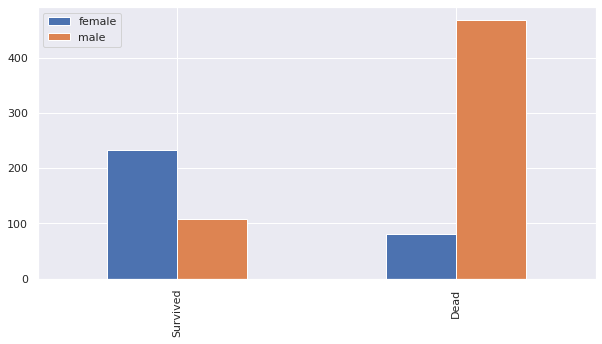

In [ ]:
bar_plot('Sex')

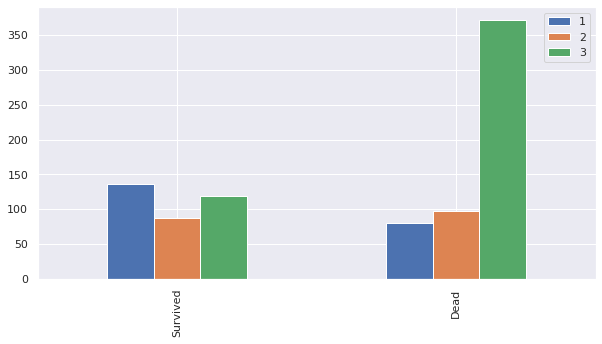

In [ ]:
bar_plot('Pclass')

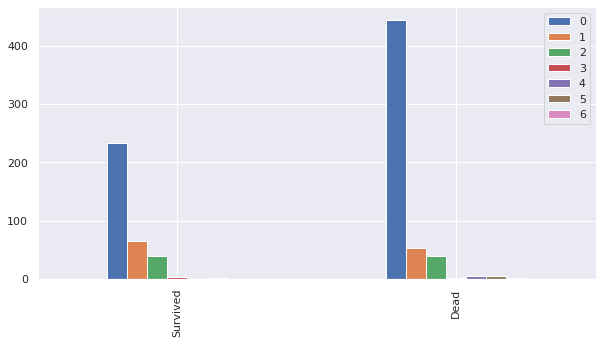

In [ ]:
 bar_plot('Parch')

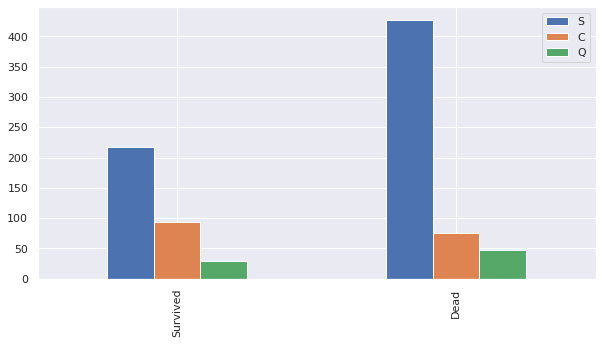

In [ ]:
 bar_plot('Embarked')

In [11]:
 combined=[train, test] # combining train and test dataset
 
for dataset in combined:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [12]:
 train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Jonkheer      1
Capt          1
Ms            1
Sir           1
Mme           1
Don           1
Lady          1
Countess      1
Name: Title, dtype: int64

In [13]:
 title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in combined:
    dataset['Title'] = dataset['Title'].map(title_mapping)

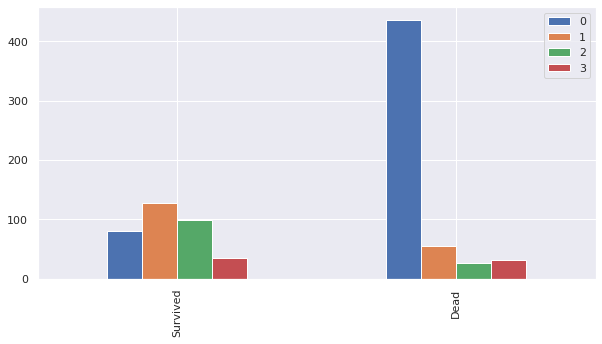

In [ ]:
bar_plot('Title')

In [14]:
 train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [15]:
 sex_mapping = {"male": 0, "female": 1}
for dataset in combined:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [17]:
 train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [18]:
 for dataset in combined:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [19]:
 embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in combined:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [20]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [21]:
dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0

In [22]:
dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1

In [23]:
 dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2

In [24]:
 dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,0,0
1,2,1,1,1,38.0,1,0,71.2833,1,2
2,3,1,3,1,26.0,0,0,7.9250,0,1
3,4,1,1,1,35.0,1,0,53.1000,0,2
4,5,0,3,0,35.0,0,0,8.0500,0,0


In [25]:
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

In [26]:
 
train.drop('Ticket', axis=1, inplace=True)
test.drop('Ticket', axis=1, inplace=True)

In [27]:
 features_drop = ['SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [28]:
 train_data = train.drop('Survived', axis=1)
target = train['Survived']
 
train_data.shape, target.shape

((891, 6), (891,))

In [ ]:
train_data.head()

,Pclass,Sex,Age,Fare,Embarked,Title
0,3,0,22.0,7.2500,0,0
1,1,1,38.0,71.2833,1,2
2,3,1,26.0,7.9250,0,1
3,1,1,35.0,53.1000,0,2
4,3,0,35.0,8.0500,0,0


In [29]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()

In [30]:
n_estimators=[int(x) for x in np.linspace(start=100, stop=1200, num=12)]
max_features= ['auto','sqrt']
max_depth= [int(x) for x in np.linspace(5,30, num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf= [1,2,5,10]

In [31]:
from sklearn.model_selection import RandomizedSearchCV

In [32]:
random_grid = {'n_estimators':n_estimators,
'max_features':max_features,
'max_depth':max_depth,
'min_samples_split':min_samples_split,
'min_samples_leaf':min_samples_leaf}

In [33]:
X_train= train_data
y_train= target

In [ ]:
 clf = RandomizedSearchCV(rf, random_grid, n_iter=100, cv=5, random_state=1)
 
model = clf.fit(X_train, y_train)